# Import and Basic Info

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import math
import random

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  # To ignore SettingWithCopyWarning warning

# Set a random seed for repeatability
rand_seed = 123
random.seed(rand_seed)
np.random.seed(rand_seed)

In [2]:
train = pd.read_csv("train.csv")
validation = pd.read_csv("validation.csv")

In [3]:
train.shape, validation.shape

((2430981, 25), (303925, 25))

In [4]:
train.columns

Index(['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP',
       'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid',
       'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice',
       'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430981 entries, 0 to 2430980
Data columns (total 25 columns):
click             int64
weekday           int64
hour              int64
bidid             object
userid            object
useragent         object
IP                object
region            int64
city              int64
adexchange        float64
domain            object
url               object
urlid             float64
slotid            object
slotwidth         int64
slotheight        int64
slotvisibility    object
slotformat        object
slotprice         int64
creative          object
bidprice          int64
payprice          int64
keypage           object
advertiser        int64
usertag           object
dtypes: float64(2), int64(11), object(12)
memory usage: 463.7+ MB


In [6]:
train.head(10)

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,domain,url,urlid,slotid,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2.0,trqRTvKaXTKfgg24JKTI,6447a7dfa30fe6eb410c91860e7c9b45,NaN,2015392487,200,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,NaN
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1.0,20fc675468712705dbf5d3eda94126da,3ddf173a94bd23c326683b6373c75dd4,NaN,mm_10982364_973726_8930541,300,250,FourthView,Na,0,10722,294,23,NaN,2821,NaN
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2.0,trqRTJn7O95I1mKYUV,625d1b5916ea925332c7b326c0574cfa,NaN,1720123646,250,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1.0,5F97t5E0BTK7XhNrUMpENpn,dedc488b98ca20707bc9a723957e7d1f,NaN,mm_10027070_118039_10308280,160,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2.0,13625cb070ffb306b425cd803c4b7ab4,4199d1227c511fc776b76594dabff9f8,NaN,1120200150,728,90,OtherView,Na,133,7330,277,133,NaN,2259,NaN
5,0,4,17,1be2cf4a47a2a6aee4b0fa64d1b786d3897be4f0,8810fd690f88ddfb797867e3e08e7816f274bd46,windows_ie,119.45.182.*,276,277,1.0,trqRTuxoGQdcFNKbuKz,bdbc836b2f86c0391bd2f1e1e50739b3,NaN,mm_10024662_3445902_11178345,336,280,2,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,123,bebefa5efe83beee17a3d245e7c5085b,1458,"10006,10077,10063,10057,10110"
6,0,3,12,6b4f23dd215a5f11136c2f29214236cfee1f0122,fbd1bcaf2b33108d2c7f88ac41f0b0194b508a9b,windows_ie,112.82.93.*,80,89,3.0,3FKElpuEMusyJqKbuKz,6957deb8d83340086ef3cb2abd9c7198,NaN,Fashion_F_Width1,1000,90,0,0,20,86c2543527c86a893d4d4f68810a0416,300,20,43f4a37f42a7c5e6219e2601b26c6976,3386,"10083,10024,10063,13496,10093,10006,10057,10110"
7,0,3,16,f7c1d8ea177211249456c79e194617ce107bc077,9b539ba886146562a3991fd9f94bb9f9bad1f647,windows_ie,118.75.92.*,15,19,1.0,trqRTvp8gIc7gspy,4c70d1fc007d5349286f58da6d08fa9,NaN,mm_33208362_3404787_11119183,160,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,134,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10024,13800,13866,10006,10111"
8,0,5,14,9e97694096fe8692851048a893231a7f7ff87922,ddc9c85b6a5726aafaa4c42239e90fb7a44a88d7,windows_ie,61.185.128.*,333,342,3.0,ersbQv1RdoTy1m58uG,cbec43b96a01da4a0e06cc78d483a24f,NaN,ALLINONE_F_Width1,1000,90,0,0,70,832b91d59d0cb5731431653204a76c0e,300,70,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10006,10083,10110"
9,0,5,0,d1b7c7fdb88ce3aa78a540bb29848dd77329a574,63b4f9a3638f81af361ab3c4190fd3e1b5e70fea,windows_chrome,117.9.211.*,2,2,3.0,ersbQv1RdoTy1m58uG,1b2f87d6f3b8b473afe7e9fbe597afca,NaN,ALLINONE_F_Width1,1000,90,0,0,70,a10c31a8ff5f42930b4c34035e523886,241,77,d29e59bf0f7f8243858b8183f14d4412,3358,"13403,10031,10063,10083,10006,10077,10075,10110"


## Missing values

In [7]:
def MissingValues(df):
    
    """
    Function to detect null values
    """
    
    obj_cols = list(df.select_dtypes(include=['object']).columns)
    nulls_list = [df[col].str.match("null").sum()*100/df.shape[0] for col in obj_cols]
    nulls_df = pd.DataFrame(index = obj_cols, columns = ["Nulls_Percentage"], data = nulls_list)
    
    return nulls_df

def ImputeMissingValues(df):
    
    """
    As will be seen, the only column that has null values and will be actually used as a feature
    in our models is "adexchange". All other columns with null values (i.e. domain, url, urlid, keypage)
    will be ignored because they have too many values to be encoded (feature space would be enormous)
    """
    
    ### Remember to impute slot_format and slot_visibility!!!
    
    #df.loc[ df["adexchange"] == "null", "adexchange"] = df["adexchange"].dropna().mode()[0]
    df["adexchange"] = df["adexchange"].fillna(df["adexchange"].dropna().mode()[0])
    df["usertag"] = df["usertag"].fillna("")  ## not optimal
    return df


In [8]:
train.isnull().sum()

click                   0
weekday                 0
hour                    0
bidid                   0
userid                  0
useragent               0
IP                      0
region                  0
city                    0
adexchange          49829
domain             137135
url                 86812
urlid             2430981
slotid                  0
slotwidth               0
slotheight              0
slotvisibility          0
slotformat              0
slotprice               0
creative                0
bidprice                0
payprice                0
keypage            504990
advertiser              0
usertag            497479
dtype: int64

In [9]:
validation.isnull().sum()

click                  0
weekday                0
hour                   0
bidid                  0
userid                 0
useragent              0
IP                     0
region                 0
city                   0
adexchange          6176
domain             16932
url                10850
urlid             303925
slotid                 0
slotwidth              0
slotheight             0
slotvisibility         0
slotformat             0
slotprice              0
creative               0
bidprice               0
payprice               0
keypage            62944
advertiser             0
usertag            62186
dtype: int64

In [10]:
train_2 = ImputeMissingValues(train)
validation_2 = ImputeMissingValues(validation)

In [11]:
train_2.shape, validation_2.shape

((2430981, 25), (303925, 25))

In [12]:
train_2.isnull().sum()

click                   0
weekday                 0
hour                    0
bidid                   0
userid                  0
useragent               0
IP                      0
region                  0
city                    0
adexchange              0
domain             137135
url                 86812
urlid             2430981
slotid                  0
slotwidth               0
slotheight              0
slotvisibility          0
slotformat              0
slotprice               0
creative                0
bidprice                0
payprice                0
keypage            504990
advertiser              0
usertag                 0
dtype: int64

In [13]:
validation_2.isnull().sum()

click                  0
weekday                0
hour                   0
bidid                  0
userid                 0
useragent              0
IP                     0
region                 0
city                   0
adexchange             0
domain             16932
url                10850
urlid             303925
slotid                 0
slotwidth              0
slotheight             0
slotvisibility         0
slotformat             0
slotprice              0
creative               0
bidprice               0
payprice               0
keypage            62944
advertiser             0
usertag                0
dtype: int64

## Feature Engineering

### Usertags

Because estimating the usertags is time consuming, we estimate it once before we proceed for further fearure engineering (so we don't need to recalculate usertags every time we run the Feature Engineering function)

In [14]:
def UsertagCategories(df):
    
    # Drop nan
    df = df["usertag"].dropna().reset_index(drop = True)
    
    # Find unique usertags
    usertags_list = [df[i].split(",") for i in range(df.shape[0])]
    
    # itertools.chain.from_iterable joins a list of lists into a single list
    usertags = np.unique(list(itertools.chain.from_iterable(usertags_list)))
    
    return usertags

In [15]:
usertags_train = UsertagCategories(train)
usertags_validation = UsertagCategories(validation)

In [16]:
usertags_train[0]

''

In [17]:
random.choice(usertags_train)

'10048'

In [18]:
list(set(usertags_train) - set(usertags_validation)), list(set(usertags_validation) - set(usertags_train))

([], [])

In [19]:
train.columns

Index(['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP',
       'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid',
       'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice',
       'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag'],
      dtype='object')

In [20]:
def DropColumns(df):
    
    columns = ["weekday", "hour", "bidid", "userid", "useragent", "IP", "domain", "url", "urlid", "slotid",
               "slotwidth", "slotheight", "slotprice", "keypage", "usertag"]
    df.drop(columns, axis = 1, inplace = True)
    
    return df

def GetDummies(df):
    
    df = pd.get_dummies(df)
    return df

def FeatureEngineering(df):
        
        # Operating system
        df["os"] = df["useragent"].map(lambda x: x.split("_")[0])
        
        # Browser
        df["browser"] = df["useragent"].map(lambda x: x.split("_")[1])
        
        # Slotarea
        df["slotarea"] = df["slotwidth"]*df["slotheight"]   ####.astype("category")
        
        # Part of the day
        df["part_of_the_day"] = ""
        
        df.loc[(df["weekday"] == 0) & (df["hour"] > 0) & (df["hour"] <=8), "part_of_the_day"] = "Sunday_Night"
        df.loc[(df["weekday"] == 0) & (df["hour"] > 8) & (df["hour"] < 17), "part_of_the_day"] = "Sunday_Morning"
        df.loc[(df["weekday"] == 0) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "part_of_the_day"] = "Sunday_Evening"
        
        df.loc[(df["weekday"] == 1) & (df["hour"] > 0) & (df["hour"] <=8), "part_of_the_day"] = "Monday_Night"
        df.loc[(df["weekday"] == 1) & (df["hour"] > 8) & (df["hour"] < 17), "part_of_the_day"] = "Monday_Morning"
        df.loc[(df["weekday"] == 1) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "part_of_the_day"] = "Monday_Evening"

        
        df.loc[(df["weekday"] == 2) & (df["hour"] > 0) & (df["hour"] <=8), "part_of_the_day"] = "Tuesday_Night"
        df.loc[(df["weekday"] == 2) & (df["hour"] > 8) & (df["hour"] < 17), "part_of_the_day"] = "Tuesday_Morning"
        df.loc[(df["weekday"] == 2) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "part_of_the_day"] = "Tuesday_Evening"

        df.loc[(df["weekday"] == 3) & (df["hour"] > 0) & (df["hour"] <=8), "part_of_the_day"] = "Wednesday_Night"
        df.loc[(df["weekday"] == 3) & (df["hour"] > 8) & (df["hour"] < 17), "part_of_the_day"] = "Wednesday_Morning"
        df.loc[(df["weekday"] == 3) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "part_of_the_day"] = "Wednesday_Evening"

        df.loc[(df["weekday"] == 4) & (df["hour"] > 0) & (df["hour"] <=8), "part_of_the_day"] = "Tuesday_Night"
        df.loc[(df["weekday"] == 4) & (df["hour"] > 8) & (df["hour"] < 17), "part_of_the_day"] = "Tuesday_Morning"
        df.loc[(df["weekday"] == 4) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "part_of_the_day"] = "Tuesday_Evening"

        df.loc[(df["weekday"] == 5) & (df["hour"] > 0) & (df["hour"] <=8), "part_of_the_day"] = "Friday_Night"
        df.loc[(df["weekday"] == 5) & (df["hour"] > 8) & (df["hour"] < 17), "part_of_the_day"] = "Friday_Morning"
        df.loc[(df["weekday"] == 5) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "part_of_the_day"] = "Friday_Evening"

        
        df.loc[(df["weekday"] == 6) & (df["hour"] > 0) & (df["hour"] <=8), "part_of_the_day"] = "Saturday_Night"
        df.loc[(df["weekday"] == 6) & (df["hour"] > 8) & (df["hour"] < 17), "part_of_the_day"] = "Saturday_Morning"
        df.loc[(df["weekday"] == 6) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "part_of_the_day"] = "Saturday_Evening"
        
        # Slotprice binning
        df["slotprice_cat"] = 0
        
        df.loc[ df["slotprice"] <= 10, "slotprice_cat"] = 0
        df.loc[ (df["slotprice"] > 10) & (df["slotprice"] <= 50), "slotprice_cat"] = 1
        df.loc[ (df["slotprice"] > 50) & (df["slotprice"] <= 100), "slotprice_cat"] = 2
        df.loc[ df["slotprice"] > 100, "slotprice_cat"] = 3

        
        # Usertags
        for tag in usertags_train:
            col_name = "usertag_" + tag
            df[col_name] = df["usertag"].map(lambda x: 1 if tag in x.split(",") else 0)
        
  
        return df

### Combine train and validation sets

Before applying the feature engineering function and encode categorical variables we will concatenate tarin and validation sets. The reason to do that, is that if we encode train and validation categorical columns separately, there is the possibility that one category that exists in train data, does not exist in validation data. This situation would cause our code to crash, since train and validation sets would consist of different features. 

In [21]:
all_data = pd.concat((train_2, validation_2), axis = 0)

In [22]:
train_2.shape, validation_2.shape, all_data.shape

((2430981, 25), (303925, 25), (2734906, 25))

In [23]:
all_data = FeatureEngineering(all_data)

In [24]:
all_data.shape

(2734906, 99)

In [25]:
all_data.head()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,domain,url,urlid,slotid,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag,os,browser,slotarea,part_of_the_day,slotprice_cat,usertag_,usertag_10006,usertag_10024,usertag_10031,usertag_10048,usertag_10052,usertag_10057,usertag_10059,usertag_10063,usertag_10067,usertag_10074,usertag_10075,usertag_10076,usertag_10077,usertag_10079,usertag_10083,usertag_10093,usertag_10102,usertag_10110,usertag_10111,usertag_10114,usertag_10115,usertag_10116,usertag_10117,usertag_10118,usertag_10120,usertag_10123,usertag_10125,usertag_10126,usertag_10127,usertag_10129,usertag_10130,usertag_10131,usertag_10133,usertag_10138,usertag_10140,usertag_10142,usertag_10145,usertag_10146,usertag_10147,usertag_10148,usertag_10149,usertag_10684,usertag_11092,usertag_11278,usertag_11379,usertag_11423,usertag_11512,usertag_11576,usertag_11632,usertag_11680,usertag_11724,usertag_11944,usertag_13042,usertag_13403,usertag_13496,usertag_13678,usertag_13776,usertag_13800,usertag_13866,usertag_13874,usertag_14273,usertag_15398,usertag_16593,usertag_16617,usertag_16661,usertag_16706,usertag_16751,usertag_16753
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2.0,trqRTvKaXTKfgg24JKTI,6447a7dfa30fe6eb410c91860e7c9b45,NaN,2015392487,200,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,,windows,ie,40000,Friday_Evening,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1.0,20fc675468712705dbf5d3eda94126da,3ddf173a94bd23c326683b6373c75dd4,NaN,mm_10982364_973726_8930541,300,250,FourthView,Na,0,10722,294,23,NaN,2821,,windows,chrome,75000,Monday_Evening,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2.0,trqRTJn7O95I1mKYUV,625d1b5916ea925332c7b326c0574cfa,NaN,1720123646,250,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110",windows,ie,62500,Wednesday_Morning,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1.0,5F97t5E0BTK7XhNrUMpENpn,dedc488b98ca20707bc9a723957e7d1f,NaN,mm_10027070_118039_10308280,160,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111",windows,ie,96000,Saturday_Evening,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2.0,13625cb070ffb306b425cd803c4b7ab4,4199d1227c511fc776b76594dabff9f8,NaN,1120200150,728,90,OtherView,Na,133,7330,277,133,NaN,2259,,windows,ie,65520,Friday_Night,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
all_data = DropColumns(all_data)

In [27]:
all_data.shape

(2734906, 84)

In [28]:
all_data.columns

Index(['click', 'region', 'city', 'adexchange', 'slotvisibility', 'slotformat',
       'creative', 'bidprice', 'payprice', 'advertiser', 'os', 'browser',
       'slotarea', 'part_of_the_day', 'slotprice_cat', 'usertag_',
       'usertag_10006', 'usertag_10024', 'usertag_10031', 'usertag_10048',
       'usertag_10052', 'usertag_10057', 'usertag_10059', 'usertag_10063',
       'usertag_10067', 'usertag_10074', 'usertag_10075', 'usertag_10076',
       'usertag_10077', 'usertag_10079', 'usertag_10083', 'usertag_10093',
       'usertag_10102', 'usertag_10110', 'usertag_10111', 'usertag_10114',
       'usertag_10115', 'usertag_10116', 'usertag_10117', 'usertag_10118',
       'usertag_10120', 'usertag_10123', 'usertag_10125', 'usertag_10126',
       'usertag_10127', 'usertag_10129', 'usertag_10130', 'usertag_10131',
       'usertag_10133', 'usertag_10138', 'usertag_10140', 'usertag_10142',
       'usertag_10145', 'usertag_10146', 'usertag_10147', 'usertag_10148',
       'usertag_10149', 'user

In [29]:
all_data_dummy = GetDummies(all_data)

In [30]:
c = all_data_dummy.columns
c

Index(['click', 'region', 'city', 'adexchange', 'bidprice', 'payprice',
       'advertiser', 'slotarea', 'slotprice_cat', 'usertag_',
       ...
       'part_of_the_day_Saturday_Night', 'part_of_the_day_Sunday_Evening',
       'part_of_the_day_Sunday_Morning', 'part_of_the_day_Sunday_Night',
       'part_of_the_day_Tuesday_Evening', 'part_of_the_day_Tuesday_Morning',
       'part_of_the_day_Tuesday_Night', 'part_of_the_day_Wednesday_Evening',
       'part_of_the_day_Wednesday_Morning', 'part_of_the_day_Wednesday_Night'],
      dtype='object', length=257)

In [31]:
all_data_dummy.head()

,click,region,city,adexchange,bidprice,payprice,advertiser,slotarea,slotprice_cat,usertag_,usertag_10006,usertag_10024,usertag_10031,usertag_10048,usertag_10052,usertag_10057,usertag_10059,usertag_10063,usertag_10067,usertag_10074,usertag_10075,usertag_10076,usertag_10077,usertag_10079,usertag_10083,usertag_10093,usertag_10102,usertag_10110,usertag_10111,usertag_10114,usertag_10115,usertag_10116,usertag_10117,usertag_10118,usertag_10120,usertag_10123,usertag_10125,usertag_10126,usertag_10127,usertag_10129,usertag_10130,usertag_10131,usertag_10133,usertag_10138,usertag_10140,usertag_10142,usertag_10145,usertag_10146,usertag_10147,usertag_10148,usertag_10149,usertag_10684,usertag_11092,usertag_11278,usertag_11379,usertag_11423,usertag_11512,usertag_11576,usertag_11632,usertag_11680,usertag_11724,usertag_11944,usertag_13042,usertag_13403,usertag_13496,usertag_13678,usertag_13776,usertag_13800,usertag_13866,usertag_13874,usertag_14273,usertag_15398,usertag_16593,usertag_16617,usertag_16661,usertag_16706,usertag_16751,usertag_16753,slotvisibility_0,slotvisibility_1,slotvisibility_2,slotvisibility_255,slotvisibility_FifthView,slotvisibility_FirstView,slotvisibility_FourthView,slotvisibility_Na,slotvisibility_OtherView,slotvisibility_SecondView,slotvisibility_ThirdView,slotformat_0,slotformat_1,slotformat_5,slotformat_Na,creative_0055e8503dc053435b3599fe44af118b,creative_00fccc64a1ee2809348509b7ac2a97a5,creative_011c1a3d4d3f089a54f9b70a4c0a6eb3,creative_0cd33fcb336655841d3e1441b915748d,creative_10717,creative_10718,creative_10719,creative_10720,creative_10721,creative_10722,creative_10723,creative_10733,creative_10734,creative_11908,creative_12610,creative_12611,creative_12612,creative_12613,creative_12614,creative_12615,creative_12616,creative_12618,creative_12619,creative_12620,creative_12621,creative_12622,creative_12623,creative_12624,creative_12625,creative_12626,creative_12627,creative_12628,creative_12629,creative_12630,creative_12631,creative_12632,creative_12633,creative_12782,creative_12987,creative_13606a7c541dcd9ca1948875a760bb31,creative_16ff51916f0c796ec72eefc633c4a8ed,creative_1a43f1ff53f48573803d4a3c31ebc163,creative_23485fcd23122d755d38f8c89d46ca56,creative_23d6dade7ed21cea308205b37594003e,creative_266f17dcc3a2280172a48fec62be7d02,creative_2abc9eaf57d17a96195af3f63c45dc72,creative_2f88fc9cf0141b5bbaf251cab07f4ce7,creative_3b805a00d99d5ee2493c8fb0063e30e9,creative_3d8f1161832704a1a34e1ccdda11a81e,creative_4400bf8dea968a0068824792fd336c4c,creative_44966cc8da1ed40c95d59e863c8c75f0,creative_449a22cd91d9042eda3d3a1b89a22ea8,creative_47905feeb59223468fb898b3c9ac024d,creative_48c6405fa5bdecc850ea6ef5e6cf4da5,creative_48f2e9ba15708c0146bda5e1dd653caa,creative_4ad7e35171a3d8de73bb862791575f2e,creative_4b724cd63dfb905ebcd54e64572c646d,creative_54c6e2569e059cf336f7e7742b44c3ba,creative_59f065a795a663140e36eec106464524,creative_5c4e0bb0db45e2d1b3a14f817196ebd6,creative_612599432d200b093719dd1f372f7a30,creative_62f7f9a6dca2f80cc00f17dcda730bc1,creative_6455a6f45433aef94075f34dafd8d3bf,creative_672fd361820651d4d99b47d7bf48d715,creative_6b9331e0f0dbbfef42c308333681f0a3,creative_6cdf8fdd3e01122b09b5b411510a2385,creative_6fb071c11134e5078c1184ef1370a110,creative_7097e4210dea4d69f07f0f5e4343529c,creative_7184c9560e68e977187e67e45a4f3198,creative_7314,creative_7315,creative_7316,creative_7317,creative_7318,creative_7319,creative_7320,creative_7321,creative_7322,creative_7323,creative_7324,creative_7325,creative_7326,creative_7327,creative_7328,creative_7330,creative_7331,creative_7332,creative_7333,creative_7334,creative_7335,creative_7336,creative_77819d3e0b3467fe5c7b16d68ad923a1,creative_798b2d49952d77f1eace9f23c210d0b5,creative_7eb0065067225fa5f511f7ffb9895f24,creative_80446133fda50388678789e3ebd9fdb1,creative_80a776343079ed94d424f4607b35fd39,creative_82f125e356439d73902ae85e2be96777,creative_832b91d59d0cb5731431653204a76c0e,creative_86c2543527c86a893d4d4f68810a0416,creative_87945ed58e806dbdc291b3662f581354,creative_8dff45ed862a7409

### Split back to train and validation

In [32]:
train_dummy = all_data_dummy[:train_2.shape[0]]
validation_dummy = all_data_dummy[train_2.shape[0]:]

In [33]:
train_dummy.shape, validation_dummy.shape

((2430981, 257), (303925, 257))

In [34]:
validation.head(1)

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,domain,url,urlid,slotid,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,4,20,bbcb813b6166538503d8b33a5602d7d72f6019dc,663169f66491c98c69f1f94a5c48fa34aa9fe06f,windows_ie,211.144.203.*,79,79,1.0,trqRTvFRLpscFU,5ede68cc7542a34777fb8a1574856b6f,NaN,mm_10027070_2459574_9659312,160,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,23,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10111"


In [35]:
validation_dummy.head(1)

,click,region,city,adexchange,bidprice,payprice,advertiser,slotarea,slotprice_cat,usertag_,usertag_10006,usertag_10024,usertag_10031,usertag_10048,usertag_10052,usertag_10057,usertag_10059,usertag_10063,usertag_10067,usertag_10074,usertag_10075,usertag_10076,usertag_10077,usertag_10079,usertag_10083,usertag_10093,usertag_10102,usertag_10110,usertag_10111,usertag_10114,usertag_10115,usertag_10116,usertag_10117,usertag_10118,usertag_10120,usertag_10123,usertag_10125,usertag_10126,usertag_10127,usertag_10129,usertag_10130,usertag_10131,usertag_10133,usertag_10138,usertag_10140,usertag_10142,usertag_10145,usertag_10146,usertag_10147,usertag_10148,usertag_10149,usertag_10684,usertag_11092,usertag_11278,usertag_11379,usertag_11423,usertag_11512,usertag_11576,usertag_11632,usertag_11680,usertag_11724,usertag_11944,usertag_13042,usertag_13403,usertag_13496,usertag_13678,usertag_13776,usertag_13800,usertag_13866,usertag_13874,usertag_14273,usertag_15398,usertag_16593,usertag_16617,usertag_16661,usertag_16706,usertag_16751,usertag_16753,slotvisibility_0,slotvisibility_1,slotvisibility_2,slotvisibility_255,slotvisibility_FifthView,slotvisibility_FirstView,slotvisibility_FourthView,slotvisibility_Na,slotvisibility_OtherView,slotvisibility_SecondView,slotvisibility_ThirdView,slotformat_0,slotformat_1,slotformat_5,slotformat_Na,creative_0055e8503dc053435b3599fe44af118b,creative_00fccc64a1ee2809348509b7ac2a97a5,creative_011c1a3d4d3f089a54f9b70a4c0a6eb3,creative_0cd33fcb336655841d3e1441b915748d,creative_10717,creative_10718,creative_10719,creative_10720,creative_10721,creative_10722,creative_10723,creative_10733,creative_10734,creative_11908,creative_12610,creative_12611,creative_12612,creative_12613,creative_12614,creative_12615,creative_12616,creative_12618,creative_12619,creative_12620,creative_12621,creative_12622,creative_12623,creative_12624,creative_12625,creative_12626,creative_12627,creative_12628,creative_12629,creative_12630,creative_12631,creative_12632,creative_12633,creative_12782,creative_12987,creative_13606a7c541dcd9ca1948875a760bb31,creative_16ff51916f0c796ec72eefc633c4a8ed,creative_1a43f1ff53f48573803d4a3c31ebc163,creative_23485fcd23122d755d38f8c89d46ca56,creative_23d6dade7ed21cea308205b37594003e,creative_266f17dcc3a2280172a48fec62be7d02,creative_2abc9eaf57d17a96195af3f63c45dc72,creative_2f88fc9cf0141b5bbaf251cab07f4ce7,creative_3b805a00d99d5ee2493c8fb0063e30e9,creative_3d8f1161832704a1a34e1ccdda11a81e,creative_4400bf8dea968a0068824792fd336c4c,creative_44966cc8da1ed40c95d59e863c8c75f0,creative_449a22cd91d9042eda3d3a1b89a22ea8,creative_47905feeb59223468fb898b3c9ac024d,creative_48c6405fa5bdecc850ea6ef5e6cf4da5,creative_48f2e9ba15708c0146bda5e1dd653caa,creative_4ad7e35171a3d8de73bb862791575f2e,creative_4b724cd63dfb905ebcd54e64572c646d,creative_54c6e2569e059cf336f7e7742b44c3ba,creative_59f065a795a663140e36eec106464524,creative_5c4e0bb0db45e2d1b3a14f817196ebd6,creative_612599432d200b093719dd1f372f7a30,creative_62f7f9a6dca2f80cc00f17dcda730bc1,creative_6455a6f45433aef94075f34dafd8d3bf,creative_672fd361820651d4d99b47d7bf48d715,creative_6b9331e0f0dbbfef42c308333681f0a3,creative_6cdf8fdd3e01122b09b5b411510a2385,creative_6fb071c11134e5078c1184ef1370a110,creative_7097e4210dea4d69f07f0f5e4343529c,creative_7184c9560e68e977187e67e45a4f3198,creative_7314,creative_7315,creative_7316,creative_7317,creative_7318,creative_7319,creative_7320,creative_7321,creative_7322,creative_7323,creative_7324,creative_7325,creative_7326,creative_7327,creative_7328,creative_7330,creative_7331,creative_7332,creative_7333,creative_7334,creative_7335,creative_7336,creative_77819d3e0b3467fe5c7b16d68ad923a1,creative_798b2d49952d77f1eace9f23c210d0b5,creative_7eb0065067225fa5f511f7ffb9895f24,creative_80446133fda50388678789e3ebd9fdb1,creative_80a776343079ed94d424f4607b35fd39,creative_82f125e356439d73902ae85e2be96777,creative_832b91d59d0cb5731431653204a76c0e,creative_86c2543527c86a893d4d4f68810a0416,creative_87945ed58e806dbdc291b3662f581354,creative_8dff45ed862a7409

In [36]:
train_dummy.columns

Index(['click', 'region', 'city', 'adexchange', 'bidprice', 'payprice',
       'advertiser', 'slotarea', 'slotprice_cat', 'usertag_',
       ...
       'part_of_the_day_Saturday_Night', 'part_of_the_day_Sunday_Evening',
       'part_of_the_day_Sunday_Morning', 'part_of_the_day_Sunday_Night',
       'part_of_the_day_Tuesday_Evening', 'part_of_the_day_Tuesday_Morning',
       'part_of_the_day_Tuesday_Night', 'part_of_the_day_Wednesday_Evening',
       'part_of_the_day_Wednesday_Morning', 'part_of_the_day_Wednesday_Night'],
      dtype='object', length=257)

In [37]:
train_dummy.drop(["bidprice", "payprice"], axis = 1, inplace = True)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [38]:
train_dummy.head()

,click,region,city,adexchange,advertiser,slotarea,slotprice_cat,usertag_,usertag_10006,usertag_10024,usertag_10031,usertag_10048,usertag_10052,usertag_10057,usertag_10059,usertag_10063,usertag_10067,usertag_10074,usertag_10075,usertag_10076,usertag_10077,usertag_10079,usertag_10083,usertag_10093,usertag_10102,usertag_10110,usertag_10111,usertag_10114,usertag_10115,usertag_10116,usertag_10117,usertag_10118,usertag_10120,usertag_10123,usertag_10125,usertag_10126,usertag_10127,usertag_10129,usertag_10130,usertag_10131,usertag_10133,usertag_10138,usertag_10140,usertag_10142,usertag_10145,usertag_10146,usertag_10147,usertag_10148,usertag_10149,usertag_10684,usertag_11092,usertag_11278,usertag_11379,usertag_11423,usertag_11512,usertag_11576,usertag_11632,usertag_11680,usertag_11724,usertag_11944,usertag_13042,usertag_13403,usertag_13496,usertag_13678,usertag_13776,usertag_13800,usertag_13866,usertag_13874,usertag_14273,usertag_15398,usertag_16593,usertag_16617,usertag_16661,usertag_16706,usertag_16751,usertag_16753,slotvisibility_0,slotvisibility_1,slotvisibility_2,slotvisibility_255,slotvisibility_FifthView,slotvisibility_FirstView,slotvisibility_FourthView,slotvisibility_Na,slotvisibility_OtherView,slotvisibility_SecondView,slotvisibility_ThirdView,slotformat_0,slotformat_1,slotformat_5,slotformat_Na,creative_0055e8503dc053435b3599fe44af118b,creative_00fccc64a1ee2809348509b7ac2a97a5,creative_011c1a3d4d3f089a54f9b70a4c0a6eb3,creative_0cd33fcb336655841d3e1441b915748d,creative_10717,creative_10718,creative_10719,creative_10720,creative_10721,creative_10722,creative_10723,creative_10733,creative_10734,creative_11908,creative_12610,creative_12611,creative_12612,creative_12613,creative_12614,creative_12615,creative_12616,creative_12618,creative_12619,creative_12620,creative_12621,creative_12622,creative_12623,creative_12624,creative_12625,creative_12626,creative_12627,creative_12628,creative_12629,creative_12630,creative_12631,creative_12632,creative_12633,creative_12782,creative_12987,creative_13606a7c541dcd9ca1948875a760bb31,creative_16ff51916f0c796ec72eefc633c4a8ed,creative_1a43f1ff53f48573803d4a3c31ebc163,creative_23485fcd23122d755d38f8c89d46ca56,creative_23d6dade7ed21cea308205b37594003e,creative_266f17dcc3a2280172a48fec62be7d02,creative_2abc9eaf57d17a96195af3f63c45dc72,creative_2f88fc9cf0141b5bbaf251cab07f4ce7,creative_3b805a00d99d5ee2493c8fb0063e30e9,creative_3d8f1161832704a1a34e1ccdda11a81e,creative_4400bf8dea968a0068824792fd336c4c,creative_44966cc8da1ed40c95d59e863c8c75f0,creative_449a22cd91d9042eda3d3a1b89a22ea8,creative_47905feeb59223468fb898b3c9ac024d,creative_48c6405fa5bdecc850ea6ef5e6cf4da5,creative_48f2e9ba15708c0146bda5e1dd653caa,creative_4ad7e35171a3d8de73bb862791575f2e,creative_4b724cd63dfb905ebcd54e64572c646d,creative_54c6e2569e059cf336f7e7742b44c3ba,creative_59f065a795a663140e36eec106464524,creative_5c4e0bb0db45e2d1b3a14f817196ebd6,creative_612599432d200b093719dd1f372f7a30,creative_62f7f9a6dca2f80cc00f17dcda730bc1,creative_6455a6f45433aef94075f34dafd8d3bf,creative_672fd361820651d4d99b47d7bf48d715,creative_6b9331e0f0dbbfef42c308333681f0a3,creative_6cdf8fdd3e01122b09b5b411510a2385,creative_6fb071c11134e5078c1184ef1370a110,creative_7097e4210dea4d69f07f0f5e4343529c,creative_7184c9560e68e977187e67e45a4f3198,creative_7314,creative_7315,creative_7316,creative_7317,creative_7318,creative_7319,creative_7320,creative_7321,creative_7322,creative_7323,creative_7324,creative_7325,creative_7326,creative_7327,creative_7328,creative_7330,creative_7331,creative_7332,creative_7333,creative_7334,creative_7335,creative_7336,creative_77819d3e0b3467fe5c7b16d68ad923a1,creative_798b2d49952d77f1eace9f23c210d0b5,creative_7eb0065067225fa5f511f7ffb9895f24,creative_80446133fda50388678789e3ebd9fdb1,creative_80a776343079ed94d424f4607b35fd39,creative_82f125e356439d73902ae85e2be96777,creative_832b91d59d0cb5731431653204a76c0e,creative_86c2543527c86a893d4d4f68810a0416,creative_87945ed58e806dbdc291b3662f581354,creative_8dff45ed862a740986dbe688aafee7e5,c

## Target variables

In [39]:
train["click"].value_counts()

0    2429188
1       1793
Name: click, dtype: int64

In [40]:
train["click"].value_counts()*100/train.shape[0]

0    99.926244
1     0.073756
Name: click, dtype: float64

In [41]:
validation["click"].value_counts()

0    303723
1       202
Name: click, dtype: int64

In [42]:
validation["click"].value_counts()*100/validation.shape[0]

0    99.933536
1     0.066464
Name: click, dtype: float64

Text(0.5,0,'Click')

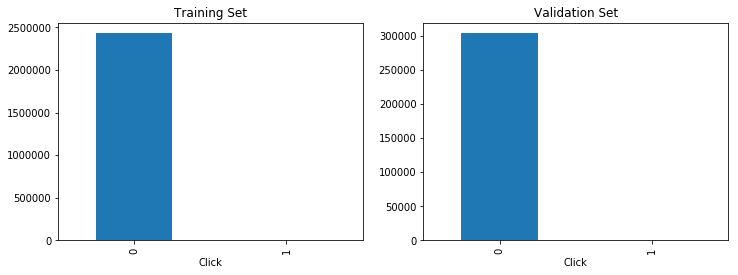

In [43]:
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
train["click"].value_counts().plot(kind = "bar", title = "Training Set")
plt.xlabel("Click")

plt.subplot(1,2,2)
validation["click"].value_counts().plot(kind = "bar", title = "Validation Set")
plt.xlabel("Click")

## Downsample Training Set

It is obvious that we have to deal with extremely imbalanced datasets. In the training set, the "negative" class (e.g. impressions) corresponds to 99.92% of total data-points and "positive" class corresponds to 0.08%. In absolute values, we have 2429188 impressions and only 1793 clicks. That means that we have a class-imbalance ratio in the order of 1:1000. For more information on the class imbalance problem, check [here](http://www.ele.uri.edu/faculty/he/PDFfiles/ImbalancedLearning.pdf). 

In [44]:
X = train_dummy.loc[:, train_dummy.columns != "click"]
y = train_dummy["click"]

In [45]:
X.shape, y.shape

((2430981, 254), (2430981,))

In [46]:
X_validation = validation_dummy.loc[:, ((validation_dummy.columns != "click") & 
                                        (validation_dummy.columns != "payprice") & 
                                        (validation_dummy.columns != "bidprice"))]
y_validation = validation_dummy["click"]

In [47]:
X_validation.shape, y_validation.shape

((303925, 254), (303925,))

In [48]:
from imblearn.under_sampling import TomekLinks, RandomUnderSampler, NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

In [49]:
clicks = train.loc[train["click"] == 1].shape[0]
impressions = train.loc[train["click"] == 0].shape[0]

In [50]:
# tl = SMOTETomek(smote = SMOTE(ratio = dict({0: impressions, 1: 5000}), random_state = 123), 
#                 tomek = TomekLinks(ratio = dict({0: 15000, 1: 5000}), random_state = 123),
#                 random_state = 123)
#tl = TomekLinks(ratio = dict({0: 5000, 1: clicks}), random_state = 123)
#tl = RandomUnderSampler(ratio = dict({0: 5000, 1: clicks}), random_state = 123, replacement = True)

In [94]:
# Random undersampling
tl = RandomUnderSampler(ratio = dict({0: 25000, 1: clicks}), random_state = rand_seed, replacement = True)
% time X_down, y_down = tl.fit_sample(train_dummy.loc[:, train_dummy.columns != "click"], train_dummy["click"])

# SMOTE oversampling
sm = SMOTE(ratio = dict({0: 25000, 1: 7500}), random_state = rand_seed)
% time X_resampled, y_resampled = sm.fit_sample(X_down, y_down)

CPU times: user 5.22 s, sys: 7.82 s, total: 13 s
Wall time: 13 s
CPU times: user 336 ms, sys: 60 ms, total: 396 ms
Wall time: 392 ms


In [95]:
X_resampled.shape, y_resampled.shape

((32500, 254), (32500,))

In [96]:
y_resampled.sum()

7500

In [58]:
# from sklearn.externals import joblib

# joblib.dump(X_downsample, 'X_downsample.pkl')
# joblib.dump(y_downsample, 'y_downsample.pkl')

# X_downsample = joblib.load('X_downsample.pkl')
# y_downsample = joblib.load('y_downsample.pkl')

## Feature Selection 

In [157]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, OneClassSVM
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV

### Recursive Feature Elimination

In [111]:
#clf_name = ["LogisticRegression", "SVM", "RandomForestClassifier", "AdaBoost", "XGBoost"]
clf_name = ["LogisticRegression"]

In [112]:
# clf = [LogisticRegression(C = 0.1, random_state = 123),
#       SVC(random_state = 123),
#       RandomForestClassifier(n_estimators = 150, random_state = 123),
#       AdaBoostClassifier(n_estimators = 200, learning_rate = 0.01, random_state = 123),
#       XGBClassifier(n_estimators = 150, max_depth = 5, learning_rate = 0.01, random_state = 123)]

In [113]:
clf = [LogisticRegression(C = 0.1, random_state = rand_seed)]

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anacond

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anacond

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anacond

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anacond

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anacond

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anacond

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anacond

CPU times: user 49.4 s, sys: 2min 56s, total: 3min 46s
Wall time: 43.2 s
Optimal number of features for LogisticRegression is 24


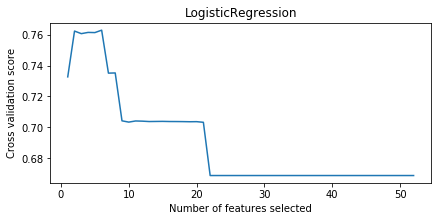

In [114]:
plt.figure(figsize = (15,10))
feature_importance = dict()

for i in range(len(clf)):
    
    model = clf[i]
    
    # Initialize Recursive Feature Elimination object
    rfecv = RFECV(estimator = model, step = 5, cv = StratifiedKFold(n_splits = 5), scoring = "f1_weighted")
    
    # Fit 
    % time rfecv.fit(X_resampled, y_resampled)
    
    # Number of important features
    print("Optimal number of features for {} is {}".format(clf_name[i], rfecv.n_features_))
    
    # Plot number of features VS. cross-validation scores
    plt.subplot(3,2,i+1)
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score")
    plt.title(clf_name[i])
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    
    # Store feature importance to dict
    feature_importance[i] = sorted(zip(map(lambda x: round(x, 4), rfecv.ranking_), X.columns))
    

In [139]:
np.where(rfecv.ranking_ == 1)

(array([  5,   7,   9,  13,  14,  21,  24,  25,  48,  50,  59,  64,  65,
         67,  76,  80,  86,  88, 103, 221, 224, 226, 227, 248]),)

In [142]:
sorted(X.columns[np.where(rfecv.ranking_ == 1)])

['browser_chrome',
 'creative_11908',
 'os_android',
 'os_mac',
 'os_windows',
 'part_of_the_day_Tuesday_Evening',
 'slotformat_0',
 'slotformat_5',
 'slotprice_cat',
 'slotvisibility_1',
 'slotvisibility_FirstView',
 'usertag_10006',
 'usertag_10031',
 'usertag_10059',
 'usertag_10063',
 'usertag_10083',
 'usertag_10110',
 'usertag_10111',
 'usertag_10684',
 'usertag_11278',
 'usertag_13042',
 'usertag_13800',
 'usertag_13866',
 'usertag_14273']

In [194]:
# feature_importance = pd.DataFrame(columns = ["feature", "ranking", "score"])
# feature_importance["feature"] = X.columns
# feature_importance["ranking"] = rfecv.ranking_
# feature_importance["score"] = feature_importance["ranking"].map(lambda x: 1/x)
# feature_importance.sort_values(["ranking", "feature"], ascending = True)

In [195]:
# plt.figure(figsize = (15, 40))
# sns.barplot(y = "feature", x = "score", data = feature_importance.sort_values(["ranking", "feature"], ascending = True), 
#             color = "lightgreen")
# plt.title("Recursive Feature Elimination", fontsize = 14)
# plt.xlabel("Score", fontsize = 14)
# plt.tight_layout()

## Training

In [162]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score

In [193]:
def plot_confusion_matrix(y_val, preds):
    ax = plt.subplot()
    sns.heatmap(confusion_matrix(y_val, preds), annot = True, cmap = "copper", fmt = "g")
    ax.xaxis.set_ticklabels(['Impression', 'Click'])
    ax.yaxis.set_ticklabels(['Impression', 'Click'])
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title("Confusion Matrix")

In [143]:
#features = list(feature_importance.loc[feature_importance["ranking"] == 1]["feature"].values)
features = sorted(X.columns[np.where(rfecv.ranking_ == 1)])

In [144]:
print("Selected features: \n {}".format(features))

Selected features: 
 ['browser_chrome', 'creative_11908', 'os_android', 'os_mac', 'os_windows', 'part_of_the_day_Tuesday_Evening', 'slotformat_0', 'slotformat_5', 'slotprice_cat', 'slotvisibility_1', 'slotvisibility_FirstView', 'usertag_10006', 'usertag_10031', 'usertag_10059', 'usertag_10063', 'usertag_10083', 'usertag_10110', 'usertag_10111', 'usertag_10684', 'usertag_11278', 'usertag_13042', 'usertag_13800', 'usertag_13866', 'usertag_14273']


In [145]:
X_train = pd.DataFrame(columns = X.columns, data = X_resampled)[features]
y_train = y_resampled

In [146]:
X_val = X_validation[features]
y_val = y_validation

### Logistic Regression

In [148]:
lr = LogisticRegression(C = 0.1, random_state = rand_seed)

In [149]:
% time lr.fit(X_train, y_train)

CPU times: user 108 ms, sys: 0 ns, total: 108 ms
Wall time: 107 ms


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [150]:
X_train.shape, y_train.shape

((32500, 24), (32500,))

In [151]:
preds = lr.predict(X_val)

In [152]:
preds.sum()

11805

In [165]:
print(roc_auc_score(y_val, preds))

0.7109172936139734


In [153]:
print(confusion_matrix(y_val, preds))

[[292011  11712]
 [   109     93]]


In [190]:
print(classification_report(y_val, preds))

             precision    recall  f1-score   support

          0       1.00      0.96      0.98    303723
          1       0.01      0.46      0.02       202

avg / total       1.00      0.96      0.98    303925



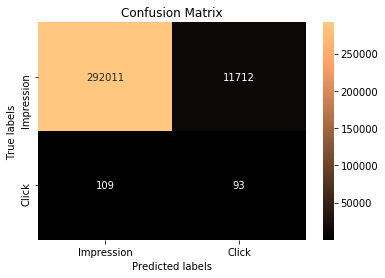

In [192]:
plot_confusion_matrix(y_val, preds)

In [178]:
predicted_proba = lr.predict_proba(X_val)

### Random Forest

In [184]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = rand_seed)

In [185]:
% time rf.fit(X_train, y_train)

CPU times: user 17 s, sys: 76 ms, total: 17.1 s
Wall time: 17.1 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [186]:
preds_rf = rf.predict(X_val)

In [187]:
print(roc_auc_score(y_val, preds_rf))

0.6864152175136913


In [188]:
print(confusion_matrix(y_val, preds_rf))

[[299681   4042]
 [   124     78]]


In [189]:
print(classification_report(y_val, preds_rf))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99    303723
          1       0.02      0.39      0.04       202

avg / total       1.00      0.99      0.99    303925



### XGBoost

In [196]:
xgb = XGBClassifier(n_estimators = 1000, random_state = rand_seed)

In [197]:
% time xgb.fit(X_train, y_train)

CPU times: user 16.4 s, sys: 4 ms, total: 16.4 s
Wall time: 16.4 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=123, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [198]:
preds_xgb = xgb.predict(X_val)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [199]:
print(roc_auc_score(y_val, preds_xgb))

0.7050293074170664


In [201]:
print(classification_report(y_val, preds_xgb))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99    303723
          1       0.03      0.42      0.05       202

avg / total       1.00      0.99      0.99    303925



In [202]:
print(confusion_matrix(y_val, preds_xgb))

[[300463   3260]
 [   117     85]]


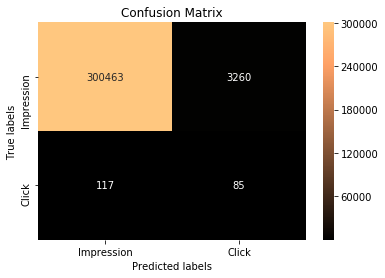

In [203]:
plot_confusion_matrix(y_val, preds_xgb)

In [217]:
xgb_proba = xgb.predict_proba(X_val)

In [218]:
xgb_click_proba = [prob[1] for prob in xgb_probab]

In [219]:
xgb_proba[:5]

array([[0.97642106, 0.02357895],
       [0.98259693, 0.01740305],
       [0.9709518 , 0.02904819],
       [0.99328256, 0.00671746],
       [0.9811628 , 0.01883723]], dtype=float32)

In [220]:
xgb_click_proba[:5]

[0.023578947, 0.01740305, 0.029048193, 0.006717457, 0.018837227]

### Hyperparameter Tuning

In [ ]:
# lr_grid = {
#            "penalty": ["l1", "l2"],
#            "C": [0.001, 0.01, 0.1, 1, 10, 100]
#           }


# knn_grid = {"n_neighbors": list(range(1,30))}


# dt_grid = {
#            "max_depth": [5,8,15,25,30,None], 
#            "min_samples_split": [2,5,10,15,100],
#            "min_samples_leaf": [1,2,5,10]
#           }


# rf_grid = {
#            "n_estimators": [120, 300, 500, 800, 1000, 1200],
#            "max_depth": [5,8,15,25,30,None]
#           }

Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

Remember that we use paramter C as our regularization parameter. Parameter C = 1/λ.
Lambda (λ) controls the trade-off between allowing the model to increase it's complexity as much as it wants with trying to keep it simple. For example, if λ is very low or 0, the model will have enough power to increase it's complexity (overfit) by assigning big values to the weights for each parameter. If, in the other hand, we increase the value of λ, the model will tend to underfit, as the model will become too simple.
Parameter C will work the other way around. For small values of C, we increase the regularization strength which will create simple models which underfit the data. For big values of C, we low the power of regularization which imples the model is allowed to increase it's complexity, and therefore, overfit the data.

# Linear Bidding Strategy

In the linear bidding strategy the bid value is linearly proportional to the p(CTR). The formula can be written as:<br>
\begin{equation}
bid = \frac{base\_bid*pCTR}{avgCTR}
\end{equation}

The tuning parameter $base\_bid$ is the bid_price for the average CTR cases. We need to optimize (?) the $base\_bid$ and the CTR estimation. 

In [251]:
base_bid = train.loc[ train["click"] == 1, "bidprice"].mean()
avgCTR = train["click"].sum()*100/train.shape[0]

In [252]:
print("Base bid: {}, avgCTR: {}".format(base_bid, avgCTR))

Base bid: 273.2269938650307, avgCTR: 0.07375623256619447


In [245]:
validation_check = validation[["bidid", "click", "bidprice", "payprice"]]

In [256]:
validation_check["click_predicted"] = preds_xgb
validation_check["click_proba"] = xgb_click_proba
validation_check["bidprice_predicted"] = (base_bid * validation_check["click_proba"])/avgCTR

In [257]:
validation_check.head()

,bidid,click,bidprice,payprice,click_predicted,click_proba,bidprice_predicted
0,bbcb813b6166538503d8b33a5602d7d72f6019dc,0,300,23,0,0.023579,87.347261
1,5a07316c49477cb5d9b4d5aa39c27d6c3be7f92d,0,238,75,0,0.017403,64.468896
2,f6ece71dae81d6b16bfb24ad6dd5611472d4c673,0,238,65,0,0.029048,107.607862
3,b4d5c57c9b38ff5a12954fa01e11931b4e6bfbbb,0,238,6,0,0.006717,24.884549
4,0899bf144249458ea9c89188473694bf44c7ca15,0,249,5,0,0.018837,69.781747


In [280]:
budget = 6250

def ValidateStrategy(df):
    
    impressions = 0
    clicks = 0
    cost = 0
    auctions_participated = 0
    money_left = 6250
    
    for row in df.iterrows():
        
        if cost <= budget:
            
            auctions_participated+=1
            
            if row[1]["bidprice_predicted"] >= row[1]["payprice"]:
                
                impressions+=1
                clicks+=row[1]["click"]
                cost+=row[1]["payprice"]
                #money_left = money_left - cost
        else:
            break
    
    print("Strategy statistics:")
    print("Auctions participated: {} | Impressions: {} | Clicks: {} | Cost: {}".format(auctions_participated, impressions,
                                                                                       clicks, cost))
    print("\n")
            
    return impressions, clicks, cost, auctions_participated

def StrategyResults(impressions, clicks, cost):
    ctr = clicks*100/impressions
    spend = cost
    cpm = cost/(impressions*1000)
    if clicks > 0:
        cpc = cost/clicks
    else:
        cpc = np.inf
        
    print("Startegy results")
    print("CTR: {} | Clicks: {} | Spend: {} | CPM: {} | CPC: {}".format(ctr, clicks, spend, cpm, cpc))
        
    return ctr, clicks, spend, cpm, cpc

In [281]:
impressions, clicks, cost, auctions_participated = ValidateStrategy(validation_check)
ctr, clicks, spend, cpm, cpc = StrategyResults(impressions, clicks, cost)

Strategy statistics:
Auctions participated: 145 | Impressions: 104 | Clicks: 0 | Cost: 6376


Startegy results
CTR: 0.0 | Clicks: 0 | Spend: 6376 | CPM: 0.061307692307692306 | CPC: inf
